In [312]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import train_test_split
import sys


In [313]:
filename = 'courseRecSys.xlsx'
splitProp = 0.95

In [314]:
def read_data(filename):
    df = pd.read_excel(filename,
    header=0,
    index_col=False,
    keep_default_na=True
    )
    return df

In [315]:
def preprocess(df):
    df=df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
   
    df["avg"] = df.mean(axis = 0, skipna=True, numeric_only=True)
    df=df.apply(lambda x: x.fillna(x.mean()),axis=0)
    df = df.drop(["avg"],axis =1)
    return df

In [316]:
na_df = read_data(filename)
na_df = na_df.drop(['Start time','Completion time','Email','Name','Name(not mandatory)\n','ID'], axis=1)
na_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.20,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.80,0.9,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,0.4,NaN,NaN,NaN
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.75,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.8,NaN,NaN,0.8,NaN
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.40,0.4,0.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.70,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.2
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.50,0.4,0.2,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,NaN,NaN,0.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [317]:
df=read_data(filename)
df = preprocess(df)
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


In [318]:
train,test = train_test_split(na_df,train_size=splitProp, random_state=42,shuffle = True)

In [319]:
test["avg"] = test.mean(axis = 1, skipna=True, numeric_only=True)
test=test.apply(lambda row: row.fillna(row["avg"]), axis=1)
test = test.drop(["avg"],axis =1)

In [320]:
courses = df.columns
courses

Index(['Data Structures and Algorithms', 'Computer Architecture\n',
       'Discrete Mathematics\n', 'Economics', 'Programming-2',
       'Machine Learning\n', 'Mathematics For Machine Learning\n',
       'Visual Recognition\n', 'Natural Language Processing\n',
       'Reinforcement Learning', 'Software Production Engineering\n',
       'Computer Graphics\n', 'Data Visualization\n',
       'Programming Languages\n', 'Cloud Computing\n',
       'Digital CMOS VLSI Design ', 'System design with FPGA ', 'ASIC design ',
       'VLSI Architecture Design\n',
       'High level synthesis and optimization of Digital Circuits ',
       'Digital Sociology ', 'Privacy in the Digital Age',
       'Technology Ethics and AI ', 'Techno-economics of networks ',
       'The Web and the Mind '],
      dtype='object')

In [321]:
core_courses = ['Data Structures and Algorithms','Computer Architecture\n','Discrete Mathematics\n','Economics','Programming-2']

In [322]:
def visualize(point):
    wcss = []  #Within Cluster Sum of Squares
    for number_of_clusters in range(1, 15): 
        kmeans = KMeans(n_clusters = number_of_clusters, random_state = 42)
        kmeans.fit(df[core_courses]) 
        wcss.append(kmeans.inertia_)
    ks = np.arange(1,15,1)
    plt.plot(ks, wcss)
    plt.axvline(point, linestyle='--', color='r')
    return wcss

[82.11226015529861,
 63.24078648485308,
 51.59371019141971,
 44.925208436514524,
 39.88330675972086,
 36.1746361281475,
 33.398702023260036,
 30.5695359693512,
 28.1421428563879,
 25.519097800451988,
 24.303521924994463,
 22.250775245363172,
 21.26505642848125,
 19.7185773653146]

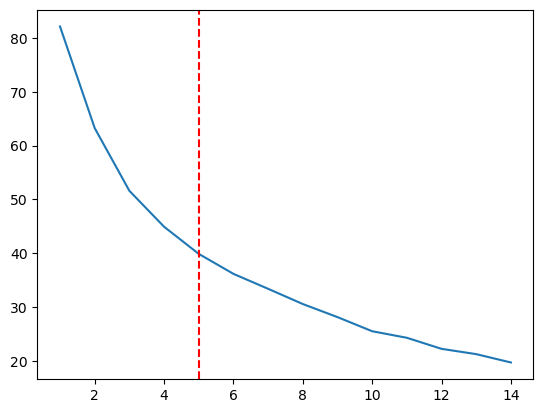

In [323]:
visualize(5)

In [324]:
def K_means(df, num_clusters, iters):
    np_dat = df.to_numpy()
    # Initialize the centroids
    range_min = np.min(np_dat, axis = 0)
    range_max = np.max(np_dat, axis = 0)
    curr_centroids = []
    np.random.seed(200)
    for i in range(num_clusters):
        curr_centroids.append(np.random.uniform(range_min, range_max))
    clusters = {}
    for it in range(iters):
        # Repopulate clusters
        clusters.clear()
        for j in range(np_dat.shape[0]):
            datapoint = np_dat[j]
            min = sys.maxsize
            min_index = 10
            for k in range(num_clusters):
                dist = np.linalg.norm(curr_centroids[k] - datapoint)
                if(dist < min):
                    min = dist
                    min_index = k
            if(clusters.get(str(min_index)) == None):
                clusters[str(min_index)] = []
            clusters[str(min_index)].append(j)
        
        # Recalculate Centroids
        new_centroids = []
        for k in range(num_clusters):
            key = str(k)
            if(clusters.get(key) == None): 
                n_centr = curr_centroids[k]
                #n_centr = np.random.uniform(range_min, range_max)
            else: n_centr = np.mean(np_dat[np.array(clusters[key])], axis = 0)
            new_centroids.append(n_centr)
        
        #if((np.not_equal(new_centroids, curr_centroids).any()) != True ): break
        curr_centroids = new_centroids
        #print(it)
    return clusters


In [325]:
def get_clustered_df(df,num_clusters):
   
    cluster_dict = K_means(df[core_courses], num_clusters, 50)
    print(cluster_dict)
    clustered_df =[]
    arr = df.to_numpy()
    for k in range(num_clusters):
        key = str(k)
        centr = np.nanmean(arr[np.array(cluster_dict[key])], axis = 0)
        clustered_df.append(centr)
    
    return clustered_df

In [326]:
def old_get_clustered_df(df,num_clusters):
    kmeans = KMeans(n_clusters = num_clusters, random_state = 42)
    clustered_matrix = kmeans.fit_predict(df[core_courses]) 
    # print(clustered_matrix.shape)
    arr = df.to_numpy()
    clustered_df = []
    for i in range(num_clusters):
        users = 0
        s=np.zeros(25)
        for j in range(len(clustered_matrix)):#162
            
            if clustered_matrix[j]==i:
                s+=arr[j]
                users = users + 1
        mean = s/users
        clustered_df.append(mean)
    return clustered_df

In [327]:
nan_clustered_df = get_clustered_df(na_df,10)

{'8': [0, 17, 26, 33, 70, 114, 117, 157], '9': [1, 3, 15, 27, 31, 48, 49, 61, 71, 72, 86, 88, 106, 152, 153], '0': [2, 7, 22, 42, 44, 56, 59, 60, 67, 93, 94, 99, 102, 104, 107, 118, 125, 134, 143, 145, 146, 154, 156, 158, 159], '3': [4, 28, 30, 32, 35, 47, 64, 80, 84, 89, 91, 98, 120, 132, 135, 142, 151, 160], '4': [5, 8, 10, 11, 13, 14, 16, 18, 19, 21, 23, 24, 25, 34, 36, 37, 41, 43, 45, 46, 53, 54, 57, 58, 62, 63, 65, 68, 76, 81, 87, 92, 96, 103, 112, 113, 116, 119, 121, 124, 128, 129, 131, 133, 137, 138, 139, 141, 148, 149, 150], '2': [6, 12, 38, 39, 51, 52, 66, 69, 73, 77, 83, 85, 90, 101, 105, 110, 123, 126, 130, 136, 140, 144], '6': [9, 82, 100, 122, 127, 155, 161], '7': [20, 50, 55, 74, 75, 78, 79, 95, 97, 109, 147], '5': [29, 40], '1': [108, 111, 115]}


In [328]:
nan_clustered_df

[array([0.848     , 0.164     , 0.568     , 0.662     , 0.884     ,
        0.73913043, 0.65833333, 0.55454545, 0.47368421, 0.49444444,
        0.67894737, 0.4725    , 0.55      , 0.46956522, 0.63529412,
        0.14166667, 0.05      , 0.075     , 0.13333333, 0.05833333,
        0.36071429, 0.48421053, 0.45384615, 0.42142857, 0.63333333]),
 array([0.        , 0.        , 0.66666667, 0.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        0.        , 0.        , 0.5       , 1.        , 0.5       ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ]),
 array([0.97045455, 0.92954545, 0.88363636, 0.2       , 0.95227273,
        0.895     , 0.845     , 0.59210526, 0.76875   , 0.71764706,
        0.58888889, 0.41176471, 0.6125    , 0.57941176, 0.50625   ,
        0.43333333, 0.45714286, 0.33571429, 0.37857143, 0.33571429,
        0.18076923, 0.49764706, 0.34076923, 

In [329]:
nan_df = pd.DataFrame(nan_clustered_df, columns = courses)
nan_df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.848000,0.164000,0.568000,0.662000,0.884000,0.739130,0.658333,0.554545,0.473684,0.494444,...,0.141667,0.050000,0.075000,0.133333,0.058333,0.360714,0.484211,0.453846,0.421429,0.633333
1,0.000000,0.000000,0.666667,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.970455,0.929545,0.883636,0.200000,0.952273,0.895000,0.845000,0.592105,0.768750,0.717647,...,0.433333,0.457143,0.335714,0.378571,0.335714,0.180769,0.497647,0.340769,0.157692,0.584615
3,0.891667,0.516667,0.205556,0.100000,0.911111,0.750000,0.547059,0.503125,0.531429,0.606000,...,0.190909,0.116667,0.100000,0.100000,0.018182,0.150000,0.245455,0.290000,0.150000,0.400000
4,0.878824,0.833137,0.823725,0.820000,0.882549,0.813721,0.816744,0.726667,0.542000,0.612500,...,0.271765,0.270000,0.315000,0.278125,0.246667,0.553125,0.466154,0.586667,0.693333,0.578125
5,0.850000,0.050000,0.050000,0.300000,0.100000,0.900000,0.850000,0.250000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.275000,0.000000,0.000000,0.000000
6,0.771429,0.914286,0.885714,0.442857,0.185714,0.850000,0.800000,0.560000,0.675000,0.500000,...,0.125000,0.200000,0.000000,0.300000,0.150000,0.000000,0.080000,0.150000,0.100000,0.050000
7,0.981818,0.913636,0.154545,0.931818,0.786364,0.872222,0.644444,0.725000,0.700000,0.740000,...,0.285714,0.428571,0.385714,0.314286,0.000000,0.520000,0.633333,0.525000,0.700000,0.460000
8,0.228296,0.656250,0.607794,0.896566,0.898485,0.758936,0.511798,0.576517,0.526180,0.317518,...,0.100000,0.050000,0.000000,0.000000,0.100000,0.500000,0.658610,0.900000,0.800000,0.600000
9,0.490000,0.783333,0.233333,0.730000,0.730000,0.742308,0.619231,0.565385,0.450000,0.637500,...,0.285714,0.350000,0.285714,0.285714,0.285714,0.314286,0.590000,0.516667,0.500000,0.625000


In [330]:
nan_df["avg"] = nan_df.mean(axis = 1, skipna=True, numeric_only=True)
nan_df=nan_df.apply(lambda row: row.fillna(row["avg"]), axis=1)
nan_df = nan_df.drop(["avg"],axis =1)

In [331]:
nan_df.isna().sum()

Data Structures and Algorithms                                0
Computer Architecture\n                                       0
Discrete Mathematics\n                                        0
Economics                                                     0
Programming-2                                                 0
Machine Learning\n                                            0
Mathematics For Machine Learning\n                            0
Visual Recognition\n                                          0
Natural Language Processing\n                                 0
Reinforcement Learning                                        0
Software Production Engineering\n                             0
Computer Graphics\n                                           0
Data Visualization\n                                          0
Programming Languages\n                                       0
Cloud Computing\n                                             0
Digital CMOS VLSI Design                

In [332]:
def svd(A):
    
    # Step 1: Compute the transpose of A
    AT = A.T
    # Step 2: Compute the product A x AT
    ATA = A.dot(AT)
    # Step 3: Compute the eigenvalues and eigenvectors of ATA
    eigenvalues, eigenvectors = np.linalg.eig(ATA)
    # Step 4: Sort the eigenvalues in descending order
    sorted_idx = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[sorted_idx]
    eigenvectors = eigenvectors[:, sorted_idx]
    # Step 5: Compute the diagonal matrix Sigma
    Sigma = np.sqrt(eigenvalues)
    # Step 6: Compute the pseudo-inverse of Sigma
    inv_Sigma = np.zeros((A.shape[1], A.shape[0]))
    print(A.shape)
    inv_Sigma[:A.shape[0], :A.shape[0]] = np.diag(1.0 / Sigma)
    # Step 7: Compute the product AT x V x inv(Sigma)
    V = AT.dot(eigenvectors)
    # Step 8: Normalize the columns of V
    V = V / np.linalg.norm(V, axis=0)
    # Step 9: Compute the product A x U x Sigma^-1
    U = A.dot(V) / Sigma
    return U, Sigma, V.T

In [333]:
k=6

In [334]:
def reduced_svd(k,A):
    U,sigma,VT = svd(A)
    reduced_matrix = np.dot(np.dot(U[:,:k],np.diag(sigma[:k])),VT[:k,:])
    return reduced_matrix


In [335]:
reduced_matrix = reduced_svd(k,np.array(nan_df))


(10, 25)


In [336]:
def EuclDist(vec1,vec2):
    return np.linalg.norm(vec1 - vec2)

In [337]:
new_user = [0.2,0.8,0.2,0.6,0.9]
new_user2 =[ 0.699459,	0.545405	,0.325405	,0.615135	,0.737838]
sooraj = [0.4, 0.8,0.85,0.9,0.7]
chinmay = [0.9,0.2,0.4,0.6 ,0.8]
kritin = [0,0,0,0,0]

In [338]:

def find_cluster(reduced_matrix,new_user):
    
    min=EuclDist(reduced_matrix[0,:5],new_user)
    cluster = 0
    for i in range(len(reduced_matrix)):
        sim = EuclDist(reduced_matrix[i,:5],new_user)#euclidean distance
        # print(sim)
        if sim<min:
            min = sim
            cluster=i
    return cluster


In [339]:
find_cluster(reduced_matrix,kritin)#testing

5

In [340]:
def find_elective_ratings(reduced_matrix,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = reduced_matrix[cluster,5:]
    return elective_ratings


In [341]:
def find_elective_ratings_from_og(reduced_matrix,original,new_user):
    cluster = find_cluster(reduced_matrix,new_user)
    elective_ratings = original[cluster,5:]
    return elective_ratings


In [342]:
elective_ratings = find_elective_ratings(reduced_matrix,kritin)

# ranking of electives

In [343]:
def get_electives_ranked(courses,elective_ratings):
    d={courses[5:][i]: elective_ratings[i] for i in range(20)}

    elective_ranked = sorted(courses[5:], key=lambda x : -d[x])
    return elective_ranked  

In [344]:
elective_ranked = get_electives_ranked(courses,elective_ratings)


In [345]:
elective_ranked

['Software Production Engineering\n',
 'Machine Learning\n',
 'Mathematics For Machine Learning\n',
 'Visual Recognition\n',
 'Privacy in the Digital Age',
 'Natural Language Processing\n',
 'Reinforcement Learning',
 'Cloud Computing\n',
 'Computer Graphics\n',
 'Techno-economics of networks ',
 'Technology Ethics and AI ',
 'Digital Sociology ',
 'VLSI Architecture Design\n',
 'The Web and the Mind ',
 'Digital CMOS VLSI Design ',
 'Data Visualization\n',
 'Programming Languages\n',
 'System design with FPGA ',
 'ASIC design ',
 'High level synthesis and optimization of Digital Circuits ']

In [346]:
def train_recommendations(X_train,num_clusters, k_svd):
    clustered_df=get_clustered_df(X_train,num_clusters)
    nan_df = pd.DataFrame(clustered_df, columns = courses)
    nan_df["avg"] = nan_df.mean(axis = 1, skipna=True, numeric_only=True)
    nan_df=nan_df.apply(lambda row: row.fillna(row["avg"]), axis=1)
    nan_df = nan_df.drop(["avg"],axis =1)
    reduced_matrix=reduced_svd(k_svd,np.array(nan_df))
    return reduced_matrix

In [347]:
def old_train_recommendations(X_train,num_clusters):
    clustered_df=old_get_clustered_df(X_train,num_clusters)
    reduced_matrix=reduced_svd(6,np.array(clustered_df))
    return reduced_matrix

In [348]:
def test_recommendations(X_test,reduced_matrix):
    pred = []
    for i in range(len(X_test)):
        new_user = X_test[i]
        elective_ratings = find_elective_ratings(reduced_matrix,new_user[:5])
        elective_ranked = get_electives_ranked(courses,elective_ratings)
        pred.append(elective_ratings)
    return pred


In [349]:
reduced_matrix = train_recommendations(train, 10, 5)

{'4': [0, 1, 5, 7, 19, 21, 26, 27, 34, 36, 39, 42, 43, 44, 47, 48, 52, 54, 56, 57, 70, 79, 84, 86, 88, 90, 93, 94, 111, 112, 113, 115, 122, 123, 124, 125, 128, 131, 132, 134, 135, 142, 143, 145, 150, 151], '3': [2, 6, 9, 24, 35, 46, 51, 61, 63, 77, 78, 87, 96, 106, 110, 120, 121, 136], '7': [3, 10, 11, 12, 15, 16, 17, 22, 29, 37, 58, 62, 69, 72, 91, 99, 100, 102, 109, 116, 119, 126, 137, 140, 144, 147, 149], '2': [4, 13, 20, 30, 32, 45, 73, 81, 85, 98, 104, 105, 107, 118, 138, 139], '0': [8, 18, 53, 66, 71, 75, 97, 108], '6': [14, 33, 49, 89, 146], '5': [23, 25, 28, 31, 38, 40, 59, 64, 67, 68, 74, 80, 95, 101, 114, 127, 133, 141, 148, 152], '1': [41, 55, 83], '8': [50, 60, 82, 92, 103, 117], '9': [65, 76, 129, 130]}
(10, 25)


In [350]:
pred=test_recommendations(test.to_numpy(),reduced_matrix)

In [351]:
def accuracy(pred,test):
    mse =[]
    for i in range(len(pred)):
        mse.append((EuclDist(pred[i],test[i][5:])))

    return sum(mse)/len(mse)

In [352]:
accuracy(pred,test.to_numpy())

1.4170793501238714

{'2': [0, 1, 4, 5, 7, 10, 12, 13, 14, 16, 17, 19, 20, 21, 25, 26, 27, 29, 30, 32, 33, 34, 36, 37, 39, 42, 43, 44, 45, 47, 48, 50, 52, 54, 56, 57, 62, 69, 70, 72, 73, 79, 81, 84, 85, 86, 88, 89, 90, 91, 93, 94, 98, 99, 100, 102, 103, 104, 105, 107, 111, 112, 113, 115, 118, 119, 122, 123, 124, 125, 128, 131, 132, 134, 135, 138, 139, 140, 142, 143, 145, 150, 151], '0': [2, 3, 6, 8, 9, 11, 15, 18, 22, 23, 24, 28, 35, 38, 40, 46, 51, 53, 58, 61, 63, 64, 66, 67, 68, 71, 74, 75, 77, 78, 80, 87, 96, 97, 101, 106, 108, 109, 110, 114, 116, 120, 121, 126, 127, 133, 136, 137, 141, 144, 147, 152], '1': [31, 41, 49, 55, 59, 60, 65, 76, 82, 83, 92, 95, 117, 129, 130, 146, 148, 149]}
(3, 25)
{'2': [0, 1, 4, 5, 12, 13, 14, 17, 19, 20, 21, 26, 27, 29, 30, 32, 33, 34, 36, 37, 39, 42, 43, 44, 45, 47, 48, 50, 52, 54, 56, 57, 62, 69, 70, 72, 73, 79, 81, 84, 85, 86, 88, 89, 90, 91, 93, 94, 98, 99, 100, 102, 103, 104, 105, 107, 111, 112, 113, 115, 118, 122, 123, 124, 125, 128, 131, 132, 134, 135, 138, 139, 14

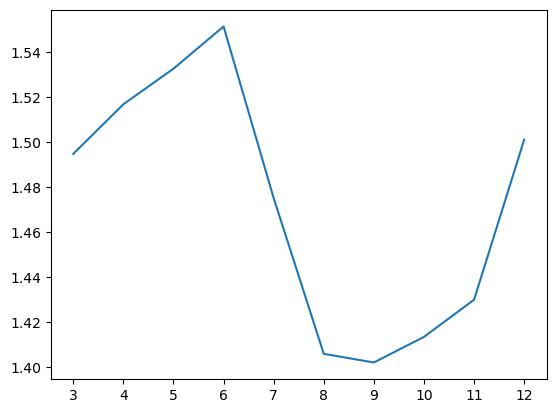

In [353]:
lt = [3,4,5,6,7,8,9,10,11,12]
acc = []
for num_clusters in lt:
    reduced_matrix = train_recommendations(train,num_clusters, 6)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = lt
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)
plt.show()   

{'4': [0, 1, 5, 7, 19, 21, 26, 27, 34, 36, 39, 42, 43, 44, 47, 48, 52, 54, 56, 57, 70, 79, 84, 86, 88, 90, 93, 94, 111, 112, 113, 115, 122, 123, 124, 125, 128, 131, 132, 134, 135, 142, 143, 145, 150, 151], '3': [2, 6, 9, 24, 35, 46, 51, 61, 63, 77, 78, 87, 96, 106, 110, 120, 121, 136], '7': [3, 10, 11, 12, 15, 16, 17, 22, 29, 37, 58, 62, 69, 72, 91, 99, 100, 102, 109, 116, 119, 126, 137, 140, 144, 147, 149], '2': [4, 13, 20, 30, 32, 45, 73, 81, 85, 98, 104, 105, 107, 118, 138, 139], '0': [8, 18, 53, 66, 71, 75, 97, 108], '6': [14, 33, 49, 89, 146], '5': [23, 25, 28, 31, 38, 40, 59, 64, 67, 68, 74, 80, 95, 101, 114, 127, 133, 141, 148, 152], '1': [41, 55, 83], '8': [50, 60, 82, 92, 103, 117], '9': [65, 76, 129, 130]}
(10, 25)
{'4': [0, 1, 5, 7, 19, 21, 26, 27, 34, 36, 39, 42, 43, 44, 47, 48, 52, 54, 56, 57, 70, 79, 84, 86, 88, 90, 93, 94, 111, 112, 113, 115, 122, 123, 124, 125, 128, 131, 132, 134, 135, 142, 143, 145, 150, 151], '3': [2, 6, 9, 24, 35, 46, 51, 61, 63, 77, 78, 87, 96, 106,

([<matplotlib.axis.XTick at 0x14a8d7730>,
 [Text(0, 0, '2'),
  Text(1, 0, '3'),
  Text(2, 0, '4'),
  Text(3, 0, '5'),
  Text(4, 0, '6'),
  Text(5, 0, '7'),
  Text(6, 0, '8'),
  Text(7, 0, '9'),
  Text(8, 0, '10')])

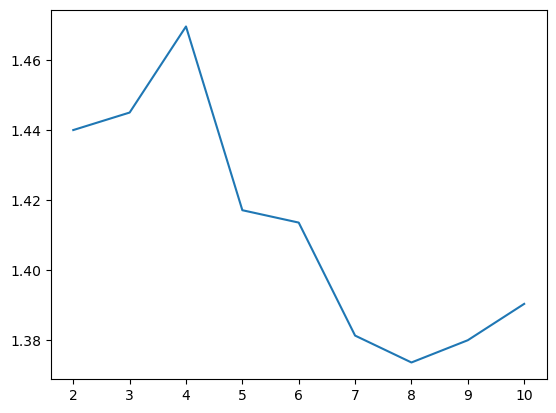

In [354]:
k_list = [2,3,4,5,6,7,8,9,10]
acc = []
for k_svd in k_list:
    reduced_matrix = train_recommendations(train,10, k_svd)
    pred=test_recommendations(test.to_numpy(),reduced_matrix)
    acc.append(accuracy(pred,test.to_numpy()))
x = k_list
default_x_ticks = range(len(x))
plt.plot(default_x_ticks, acc)
plt.xticks(default_x_ticks, x)

In [355]:
for i in pred:
    elective_ranked = get_electives_ranked(courses,i)
    print(elective_ranked)
    print("*****************")

['Machine Learning\n', 'The Web and the Mind ', 'Mathematics For Machine Learning\n', 'Technology Ethics and AI ', 'Techno-economics of networks ', 'Privacy in the Digital Age', 'Software Production Engineering\n', 'Digital Sociology ', 'Cloud Computing\n', 'Visual Recognition\n', 'Computer Graphics\n', 'Data Visualization\n', 'Reinforcement Learning', 'Programming Languages\n', 'Natural Language Processing\n', 'ASIC design ', 'Digital CMOS VLSI Design ', 'High level synthesis and optimization of Digital Circuits ', 'System design with FPGA ', 'VLSI Architecture Design\n']
*****************
['Machine Learning\n', 'Cloud Computing\n', 'Software Production Engineering\n', 'Data Visualization\n', 'Mathematics For Machine Learning\n', 'Reinforcement Learning', 'Natural Language Processing\n', 'Visual Recognition\n', 'Techno-economics of networks ', 'Privacy in the Digital Age', 'Computer Graphics\n', 'The Web and the Mind ', 'Technology Ethics and AI ', 'System design with FPGA ', 'Program

In [356]:
df

,Data Structures and Algorithms,Computer Architecture\n,Discrete Mathematics\n,Economics,Programming-2,Machine Learning\n,Mathematics For Machine Learning\n,Visual Recognition\n,Natural Language Processing\n,Reinforcement Learning,...,Digital CMOS VLSI Design,System design with FPGA,ASIC design,VLSI Architecture Design\n,High level synthesis and optimization of Digital Circuits,Digital Sociology,Privacy in the Digital Age,Technology Ethics and AI,Techno-economics of networks,The Web and the Mind
0,0.30,0.85,0.85,0.90,0.70,0.70,0.80,0.620098,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.600000,0.423286,0.396622,0.510897
1,0.70,0.80,0.20,0.80,0.80,0.50,0.10,0.200000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.500000,0.423286,0.396622,0.510897
2,0.70,0.00,1.00,1.00,1.00,1.00,1.00,0.800000,0.900000,1.000000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.400000,0.423286,0.396622,0.510897
3,0.65,0.70,0.20,0.75,0.75,0.75,0.75,0.750000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.800000,0.452708,0.423286,0.800000,0.510897
4,0.70,0.60,0.20,0.00,0.80,0.50,0.60,0.400000,0.400000,0.200000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,0.00,1.00,0.50,0.70,0.60,0.50,0.30,0.700000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.000000,0.423286,0.396622,0.510897
158,1.00,0.00,0.00,0.70,0.70,0.00,0.00,0.000000,0.572638,0.603495,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.200000
159,0.60,0.30,0.40,0.90,0.80,0.70,0.40,0.500000,0.400000,0.200000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,1.000000,0.423286,0.396622,1.000000
160,0.80,0.60,0.20,0.40,0.70,0.70,0.80,0.620098,0.572638,0.700000,...,0.251538,0.246316,0.214805,0.234868,0.168056,0.318243,0.452708,0.423286,0.396622,0.510897


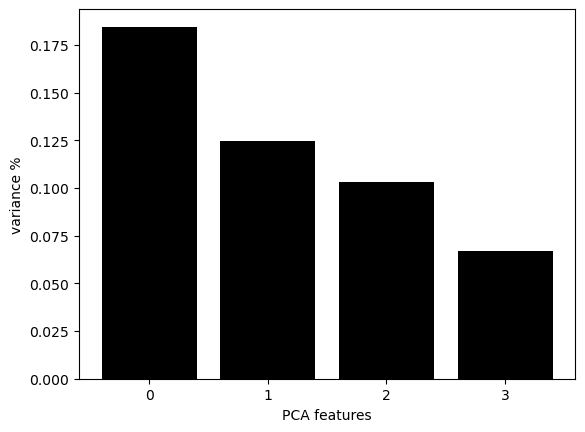

In [357]:
from sklearn.decomposition import PCA
X_std = StandardScaler().fit_transform(df)
pca = PCA(n_components=4)
principalComponents = pca.fit_transform(X_std)
# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)
# Save components to a DataFrame
PCA_components = pd.DataFrame(principalComponents)

Text(0, 0.5, 'PCA 3')

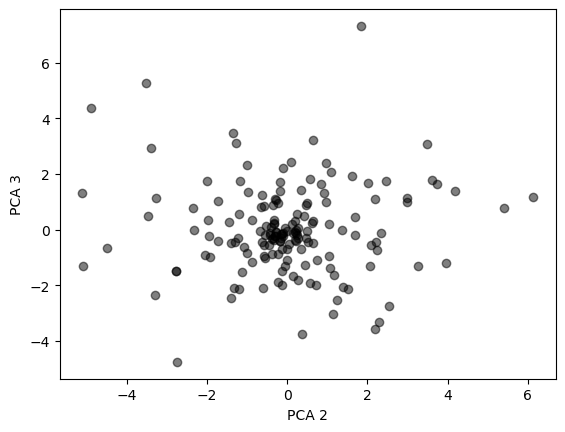

In [358]:
plt.scatter(PCA_components[1], PCA_components[2], alpha=.5, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')


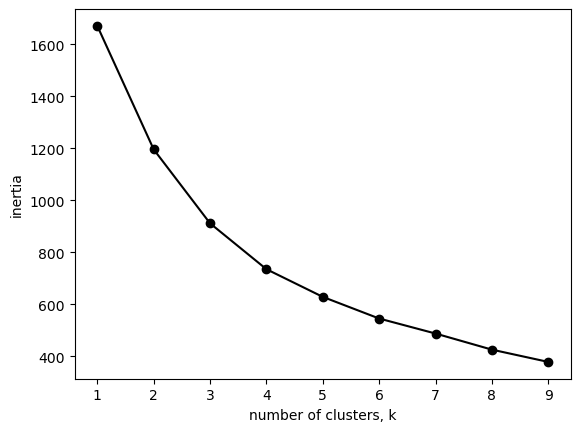

In [359]:
ks = range(1, 10)
inertias = []
for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(PCA_components.iloc[:,:3])
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
plt.plot(ks, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()